# Assignment09 : Extended binary classifier - Mnist
# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub Link : https://github.com/joo228/assignment.git

# import package for plotting, data management and dealing image

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# read train and test data

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


# normalize the values of the input data to be [0, 1]

In [3]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# example of distance function between two vectors x and y

In [4]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form

In [5]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# plot first 150 images out of 10,000 with their labels

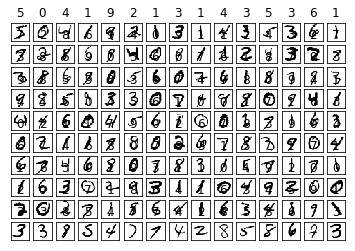

In [6]:
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# plot the average image of all the images for each digit

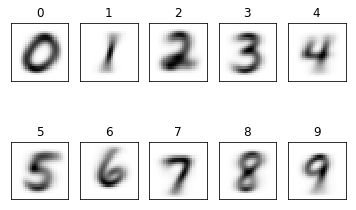

In [7]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# define new binary label

In [8]:
binary_label_train = np.empty(num_train, dtype=int)
for i in range(num_train):
    if list_label_train[i]==0:
        binary_label_train[i]=1
    else:
        binary_label_train[i]=-1

binary_label_test = np.empty(num_test, dtype=int)
for i in range(num_test):
    if list_label_test[i]==0:
        binary_label_test[i]=1
    else:
        binary_label_test[i]=-1

# define training and testing with feature function : $ f_i$

# $f_i(x)=r_i^Tx, (ri = N(0,\sigma))$

### 1. train the model parmeters with feature function

### 2. apply the model parameters to test data and compare with test label

### 3. calculate TP, FP, TN, FN

### 4. plot average image of TP, FP, TN, FN

In [18]:
def featureFunc(train_data, p):
    r=np.empty((p, 784), dtype=float)
    for i in range(p):
        r[i,:]=np.random.normal(0,1,784)
    A=np.matmul(r, train_data)
    pinv_A=np.linalg.pinv(A)
    theta=np.matmul(pinv_A.transpose(), binary_label_train.transpose())
    test_feature = np.matmul(r,list_image_test)
    y=np.matmul(test_feature.transpose(), theta)
    for i in range(num_test):
        if y[i]>0:
            y[i]=1
        else:
            y[i]=-1
    im_average  = np.zeros((size_row * size_col, 4), dtype=float) #0: TP, 1: FP, 2: TN, 3: FN
    im_count    = np.zeros(4, dtype=int)

    for i in range(num_test):
        if y[i]==1:
            if y[i]==binary_label_test[i]:
                im_average[:, 0] += list_image_test[:, i]
                im_count[0] += 1
            else:
                im_average[:, 1] += list_image_test[:, i]
                im_count[1] += 1
        else:
            if y[i]==binary_label_test[i]:
                im_average[:, 2] += list_image_test[:, i]
                im_count[2] += 1
            else:
                im_average[:, 3] += list_image_test[:, i]
                im_count[3] += 1
        precision = im_count[0]/(im_count[0]+im_count[1])
        recall = im_count[0]/(im_count[0]+im_count[3])
        F1_score = (2*precision*recall)/(precision+recall)
    for i in range(4):
        if im_count[i]!=0:
            im_average[:, i] /= im_count[i]
        plt.subplot(2, 2, i+1)
        title=["True Positive", "False Positive", "True Negative", "False Negative"]
        plt.title(title[i])
        plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys')
        plt.suptitle("TP, FP, TN, FN of p = %i" %p)
    plt.show()
    return F1_score

# try with varying the number of parameters p = 1, 10, 100, 200, 400, 600, 700, 800, 900, 1000

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


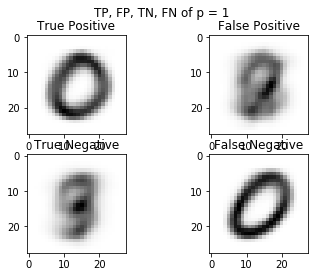

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars


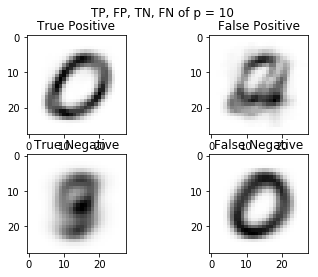

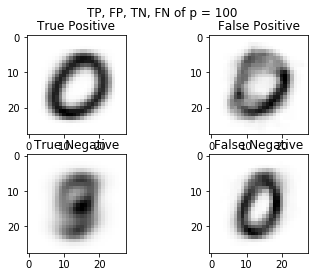

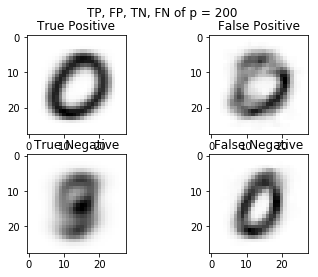

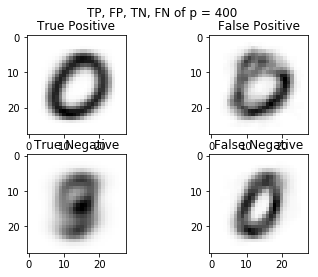

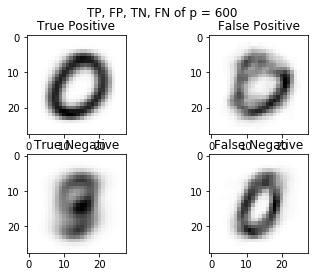

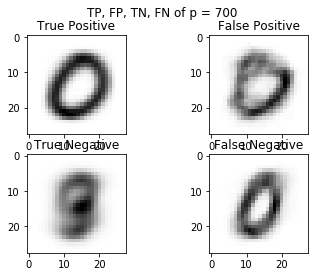

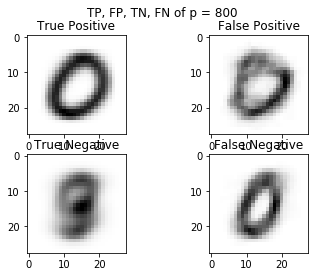

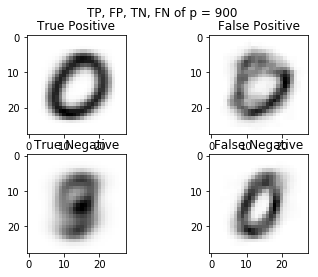

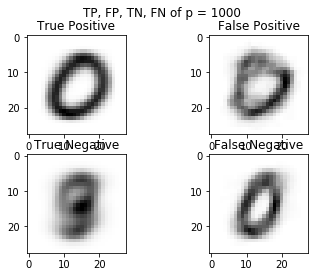

In [38]:
p_list = [1, 10, 100, 200, 400, 600, 700, 800, 900, 1000]
F1_list = np.empty((len(p_list)), dtype=float)
for i in range(len(p_list)):
    F1_list[i] = featureFunc(list_image_train, p_list[i])

# plot the F1 Score with varying p

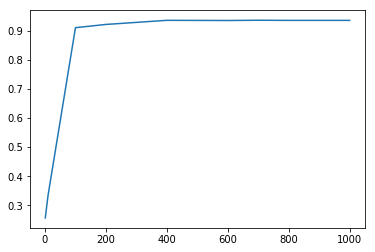

In [39]:
plt.plot(p_list, F1_list)

# find the best F1 Score, parameter p

In [44]:
print("The best F1 Score is "+str(max(F1_list))+ ", when p is "+ str(p_list[np.argmax(F1_list)]))

The best F1 Score is 0.937148696985, when p is 700
